In [68]:
import os

path = r"C:\Users\HP\OneDrive\Documentos\Tecnicas2" #/era5 horario
os.listdir(path)


['2da entrega proyecto.ipynb',
 'Copia de sesion07.ipynb',
 'CORRECCION_PARCIAL (2).ipynb',
 'Cálculo del SPI.docx',
 'data',
 'data.nc',
 'datos01.xlsx',
 'datos02.csv',
 'datos03',
 'datos_era_1991_2020.nc',
 'eventos_año.png',
 'evidencia_2021_2023.cpg',
 'evidencia_2021_2023.dbf',
 'evidencia_2021_2023.png',
 'evidencia_2021_2023.prj',
 'evidencia_2021_2023.shp',
 'evidencia_2021_2023.shx',
 'examen_parcial.ipynb',
 'EXAMEN_P_2025_ii',
 'expo-script.ipynb',
 'imagenes',
 'install-tl-20250902',
 'Leon_Chapoñan_Nataly_Nicolie_EMC.ipynb',
 'Leon_Chapoñan_Nataly_Nicolie_examen_parcial.ipynb',
 'Leon_Chapoñan_Nataly_Nicolie_PC2.ipynb',
 'Leon_Chapoñan_Nataly_PC2.ipynb',
 'Leon_Chapoñan_Nataly_tarea4.ipynb',
 'Leon_Chapoñan_Nataly_tarea5.ipynb',
 'mapa_años.png',
 'mapa_filtrado.png',
 'MODULO.ipynb',
 'MODULOS',
 'Paper_OnLine_Pure_and_Applied Geofhysics.pdf',
 'paquete',
 'paquete_par',
 'pc3',
 'PC3_2025_ii',
 'PISCO_Peru_1991_2020.nc',
 'PISCO_pp_1991_2020.csv',
 'PISCO_precip_1991_2

PISCO

In [133]:
import xarray as xr

ds = xr.open_dataset(path + "/data.nc")
ds

<xarray.Dataset> Size: 11MB
Dimensions:  (T: 10958, Y: 10, X: 25)
Coordinates:
  * T        (T) datetime64[ns] 88kB 1987-01-01T12:00:00 ... 2016-12-31T12:00:00
  * Y        (Y) float32 40B -4.05 -4.15 -4.25 -4.35 ... -4.65 -4.75 -4.85 -4.95
  * X        (X) float32 100B -80.95 -80.85 -80.75 ... -78.75 -78.65 -78.55
Data variables:
    Prec     (T, Y, X) float32 11MB ...

In [91]:
import xarray as xr
import pandas as pd

df = ds.to_dataframe().reset_index()

df.head(10)

,T,Y,X,Prec
0,1987-01-01 12:00:00,-4.05,-80.949997,0.033394
1,1987-01-01 12:00:00,-4.05,-80.849998,0.038122
2,1987-01-01 12:00:00,-4.05,-80.750000,0.047830
3,1987-01-01 12:00:00,-4.05,-80.650002,0.058272
4,1987-01-01 12:00:00,-4.05,-80.550003,0.082517
5,1987-01-01 12:00:00,-4.05,-80.449997,0.042129
6,1987-01-01 12:00:00,-4.05,-80.349998,0.062371
7,1987-01-01 12:00:00,-4.05,-80.250000,0.081858
8,1987-01-01 12:00:00,-4.05,-80.150002,0.102258
9,1987-01-01 12:00:00,-4.05,-80.050003,0.132579


SEGREGAMOS ESTACIONES

In [92]:
#AYABACA
lat_ayabaca = -4.64
lon_ayabaca = -79.71

ds_ayabaca = ds.interp(Y=lat_ayabaca, X=lon_ayabaca)
df_ayabaca = ds_ayabaca.to_dataframe().reset_index()
df_ayabaca.head()


,T,Prec,Y,X
0,1987-01-01 12:00:00,0.486936,-4.64,-79.71
1,1987-01-02 12:00:00,0.198538,-4.64,-79.71
2,1987-01-03 12:00:00,1.409514,-4.64,-79.71
3,1987-01-04 12:00:00,0.461849,-4.64,-79.71
4,1987-01-05 12:00:00,9.325925,-4.64,-79.71


In [93]:
#ESPEZANZA
lat_esperanza = -4.92
lon_esperanza = -80.94

ds_esperanza = ds.interp(Y=lat_esperanza, X=lon_esperanza)
df_esperanza = ds_esperanza.to_dataframe().reset_index()
df_esperanza.head()


,T,Prec,Y,X
0,1987-01-01 12:00:00,0.007393,-4.92,-80.94
1,1987-01-02 12:00:00,0.001387,-4.92,-80.94
2,1987-01-03 12:00:00,0.012034,-4.92,-80.94
3,1987-01-04 12:00:00,0.040224,-4.92,-80.94
4,1987-01-05 12:00:00,0.023599,-4.92,-80.94


In [94]:
aya_mensual = ds_ayabaca.resample(T="1M").sum()
esp_mensual = ds_esperanza.resample(T="1M").sum()

c:\Users\HP\TP2\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\HP\TP2\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [95]:
df_aya_mensual_P = aya_mensual.to_dataframe().reset_index()
df_aya_mensual_P.head()

,T,Prec,Y,X
0,1987-01-31,231.715549,-4.64,-79.71
1,1987-02-28,158.295755,-4.64,-79.71
2,1987-03-31,285.789403,-4.64,-79.71
3,1987-04-30,261.150556,-4.64,-79.71
4,1987-05-31,46.884441,-4.64,-79.71


In [96]:
df_esp_mensual_P = esp_mensual.to_dataframe().reset_index()
df_esp_mensual_P.head()

,T,Prec,Y,X
0,1987-01-31,2.247961,-4.92,-80.94
1,1987-02-28,11.506278,-4.92,-80.94
2,1987-03-31,1.811170,-4.92,-80.94
3,1987-04-30,1.220993,-4.92,-80.94
4,1987-05-31,0.000000,-4.92,-80.94


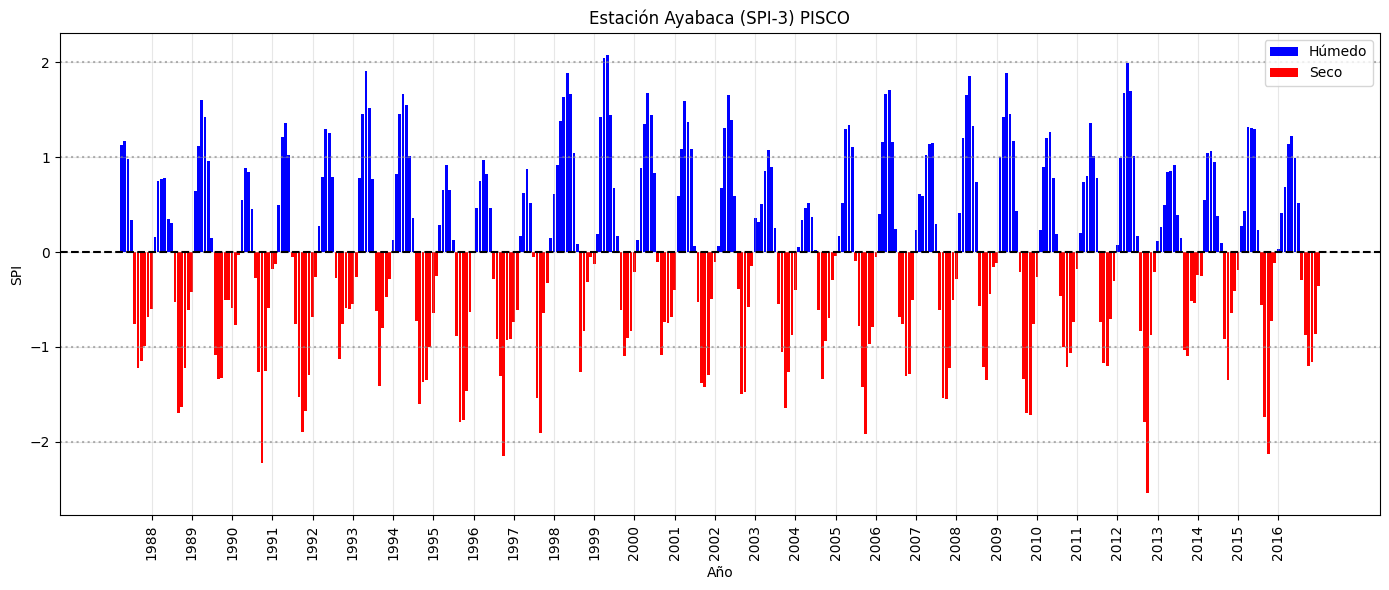

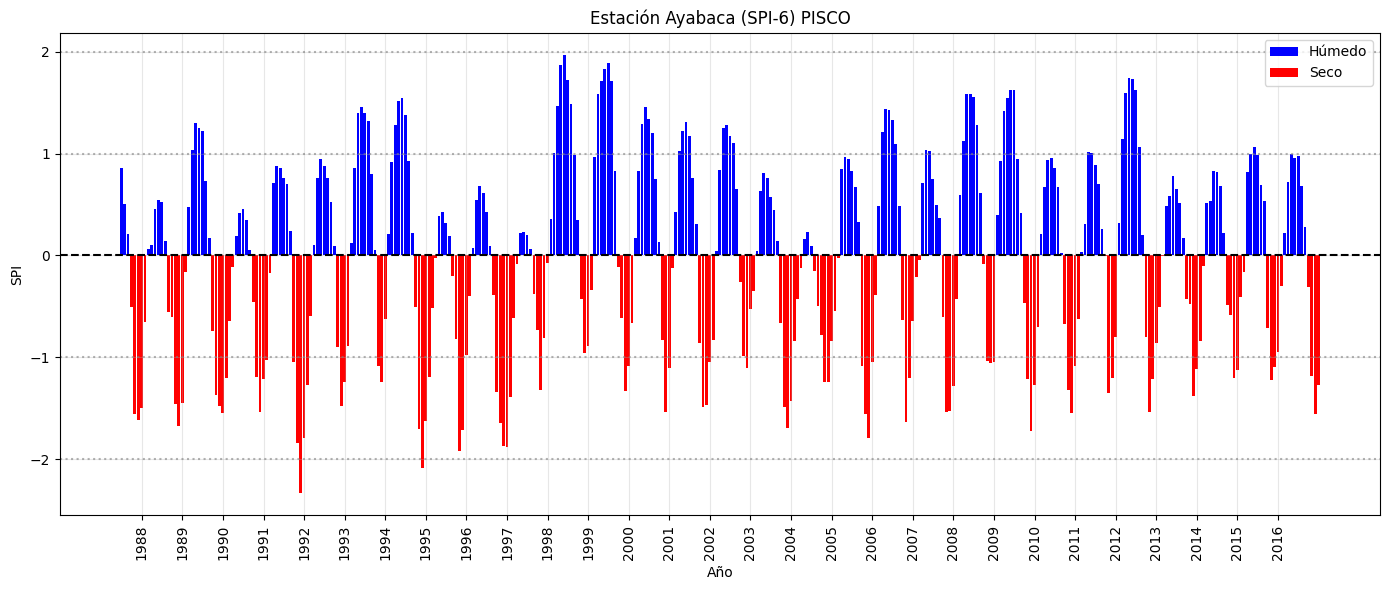

Listo. SPI para la estación Ayabaca generado.


In [134]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ==========================================================
# 1 — USAR TU DATA DE UNA ESTACIÓN
# ==========================================================
df = df_aya_mensual_P
df['T'] = pd.to_datetime(df['T'])
df = df.sort_values("T")


# ==========================================================
# 2 — FUNCIÓN SPI (McKee)
# ==========================================================
def calcular_spi_mckee(serie, ventana):
    # 1) Acumulado
    acum = serie.rolling(ventana).sum().dropna()

    # 2) Probabilidad de cero
    q = (acum == 0).mean()

    # 3) Ajuste Gamma
    datos = acum[acum > 0]
    alpha, loc, beta = stats.gamma.fit(datos, floc=0)

    # 4) Probabilidad acumulada
    F = q + (1-q) * stats.gamma.cdf(datos, alpha, loc=0, scale=beta)

    # 5) Convertir a SPI
    spi_aya_P = stats.norm.ppf(F)

    # 6) Reconstruir serie
    resultado = np.full(len(serie), np.nan)
    resultado[acum.index] = spi_aya_P
    return resultado


# ==========================================================
# 3 — CALCULAR SPI 3, 6, 12, 24
# ==========================================================
ventanas = [3, 6]

for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['Prec'], v)


# ==========================================================
# 4 — GRAFICAR SPI PARA ESTA ESTACIÓN
# ==========================================================
for v in [3, 6]:

    plt.figure(figsize=(14, 6))
    spi_data = df[f"SPI_{v}"]

    colores = ['red' if x < 0 else 'blue' for x in spi_data]

    plt.bar(df['T'], spi_data, color=colores, width=25)

    plt.axhline(0, color='black', linestyle='--')
    plt.axhline(-1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(-2, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(2, color='grey', linestyle=':', alpha=0.6)

    plt.title(f"Estación Ayabaca (SPI-{v}) PISCO")
    plt.ylabel("SPI")
    plt.xlabel("Año")

    # Etiquetas de año
    años = pd.date_range(df['T'].min(), df['T'].max(), freq='YS')
    plt.xticks(años, [str(a.year) for a in años], rotation=90)

    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='Húmedo'),
        Patch(facecolor='red', label='Seco')
    ]
    plt.legend(handles=legend_elements, loc='upper right', frameon=True)

    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(f"spi_ayabaca_pisco_{v}.png", dpi=300, bbox_inches='tight')
    plt.show()


# ==========================================================
# 5 — EXPORTAR TABLA FINAL
# ==========================================================
df.to_csv("spi_aya_mensual.csv", index=False)
print("Listo. SPI para la estación Ayabaca generado.")


In [151]:
df_aya_mensual_P = df
for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['Prec'], v)

df_aya_mensual_P = df   # ← AQUÍ SE GUARDA CON SPI

In [99]:
import numpy as np
import pandas as pd
from scipy import stats

def calcular_spi_mckee(serie, escala):

    # 1) Acumulado
    acum = serie.rolling(escala).sum()

    # 2) Identificar ceros
    zeros = (acum == 0).sum()
    n = acum.count()
    q = zeros / n

    # 3) Filtrar solo datos > 0 para ajustar Gamma
    datos_pos = acum[acum > 0]

    # Evitar fallas por pocos datos
    if len(datos_pos) < 10:
        return np.full(len(serie), np.nan)

    # 4) Ajuste Gamma
    alpha, loc, beta = stats.gamma.fit(datos_pos, floc=0)

    # 5) Probabilidad acumulada
    H = pd.Series(index=acum.index, dtype="float64")

    # Para valores > 0
    H[acum > 0] = q + (1-q) * stats.gamma.cdf(acum[acum > 0], alpha, loc=0, scale=beta)

    # Para valores = 0
    H[acum == 0] = q

    # 6) Transformación a SPI
    spi_esp_E = stats.norm.ppf(H)

    return spi_esp_E


In [61]:
df['SPI_3'] = calcular_spi_mckee(df['Prec'], 3)
df['SPI_6'] = calcular_spi_mckee(df['Prec'], 6)
df['SPI_12'] = calcular_spi_mckee(df['Prec'], 12)
df['SPI_24'] = calcular_spi_mckee(df['Prec'], 24)

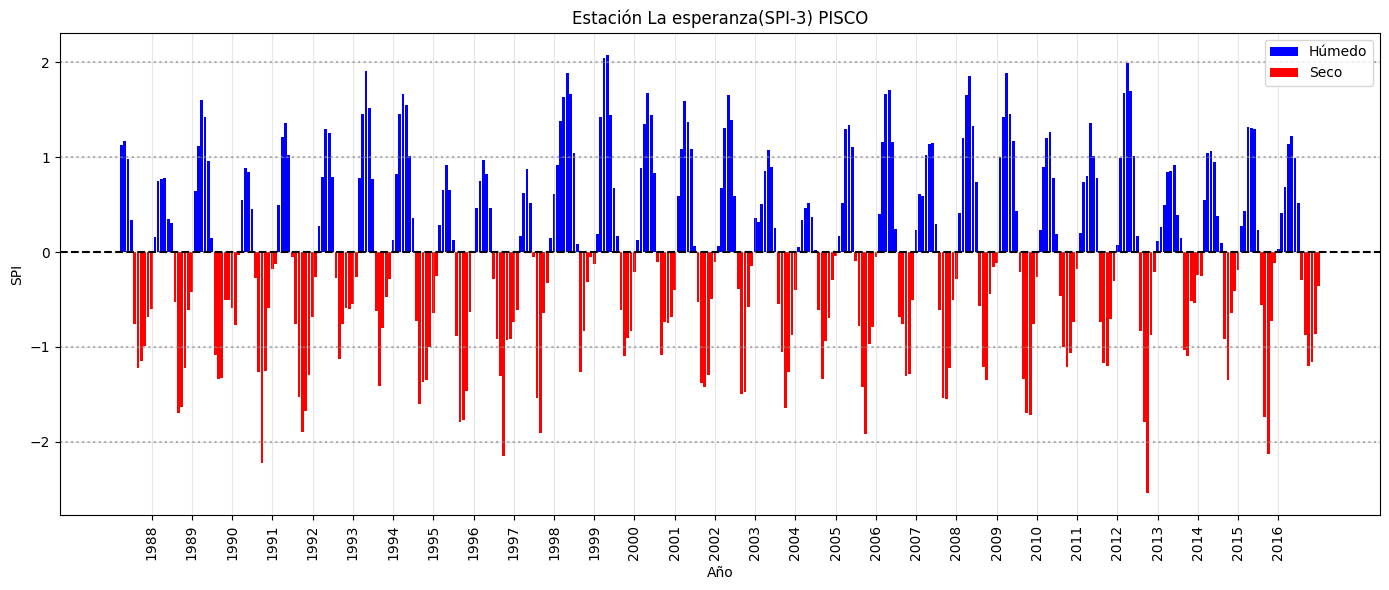

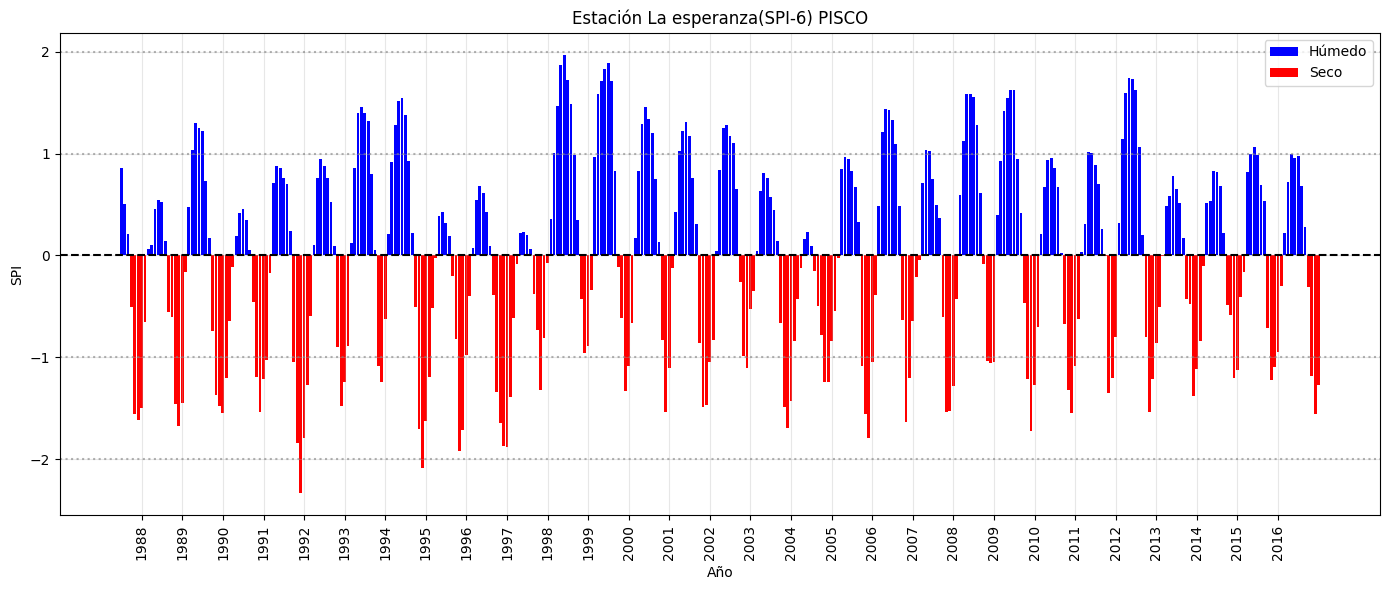

Listo. SPI para la estación Ayabaca generado.


In [135]:

# ==========================================================
# 3 — CALCULAR SPI 3, 6, 12, 24
# ==========================================================
ventanas = [3, 6]

for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['Prec'], v)


# ==========================================================
# 4 — GRAFICAR SPI PARA ESTA ESTACIÓN
# ==========================================================
for v in [3, 6]:

    plt.figure(figsize=(14, 6))
    spi_data = df[f"SPI_{v}"]

    colores = ['red' if x < 0 else 'blue' for x in spi_data]

    plt.bar(df['T'], spi_data, color=colores, width=25)

    plt.axhline(0, color='black', linestyle='--')
    plt.axhline(-1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(-2, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(2, color='grey', linestyle=':', alpha=0.6)

    plt.title(f"Estación La esperanza(SPI-{v}) PISCO")
    plt.ylabel("SPI")
    plt.xlabel("Año")

    # Etiquetas de año
    años = pd.date_range(df['T'].min(), df['T'].max(), freq='YS')
    plt.xticks(años, [str(a.year) for a in años], rotation=90)

    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='Húmedo'),
        Patch(facecolor='red', label='Seco')
    ]
    plt.legend(handles=legend_elements, loc='upper right', frameon=True)

    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(f"spi_La esperanza_pisco_{v}.png", dpi=300, bbox_inches='tight')
    plt.show()


# ==========================================================
# 5 — EXPORTAR TABLA FINAL
# ==========================================================
df.to_csv("spi_esp_pisco_mensual.csv", index=False)
print("Listo. SPI para la estación Ayabaca generado.")

In [137]:
df_esp_mensual_P = df
for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['Prec'], v)

df_esp_mensual_P = df   # ← AQUÍ SE GUARDA CON SPI

ERA 5

In [154]:
import xarray as xr

ds = xr.open_dataset(path + "/datos_era_1991_2020.nc")
ds

<xarray.Dataset> Size: 64MB
Dimensions:     (valid_time: 262992, latitude: 5, longitude: 11)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 2MB 1991-01-01 ... 2020-12-31T23:...
  * latitude    (latitude) float64 40B -4.0 -4.25 -4.5 -4.75 -5.0
  * longitude   (longitude) float64 88B -81.0 -80.75 -80.5 ... -78.75 -78.5
    expver      (valid_time) <U4 4MB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 58MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-24T23:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [155]:
import xarray as xr
import pandas as pd

df = ds.to_dataframe().reset_index()

df.head(10)

,valid_time,latitude,longitude,tp,number,expver
0,1991-01-01,-4.0,-81.00,0.000000,0,0001
1,1991-01-01,-4.0,-80.75,0.000416,0,0001
2,1991-01-01,-4.0,-80.50,0.000556,0,0001
3,1991-01-01,-4.0,-80.25,0.000380,0,0001
4,1991-01-01,-4.0,-80.00,0.000371,0,0001
5,1991-01-01,-4.0,-79.75,0.000381,0,0001
6,1991-01-01,-4.0,-79.50,0.000244,0,0001
7,1991-01-01,-4.0,-79.25,0.000269,0,0001
8,1991-01-01,-4.0,-79.00,0.000567,0,0001
9,1991-01-01,-4.0,-78.75,0.002353,0,0001


In [156]:
#AYABACA
lat_ayabaca = -4.64
lon_ayabaca = -79.71

ds_ayabaca = ds.interp(latitude=lat_ayabaca, longitude=lon_ayabaca)
df_ayabaca = ds_ayabaca.to_dataframe().reset_index()
df_ayabaca.head()

,valid_time,tp,number,expver,latitude,longitude
0,1991-01-01 00:00:00,0.000645,0,0001,-4.64,-79.71
1,1991-01-01 01:00:00,0.000287,0,0001,-4.64,-79.71
2,1991-01-01 02:00:00,0.000173,0,0001,-4.64,-79.71
3,1991-01-01 03:00:00,0.000052,0,0001,-4.64,-79.71
4,1991-01-01 04:00:00,0.000011,0,0001,-4.64,-79.71


In [105]:
#ESPEZANZA
lat_esperanza = -4.92
lon_esperanza = -81

ds_esperanza = ds.interp(latitude=lat_esperanza, longitude=lon_esperanza)
df_esperanza = ds_esperanza.to_dataframe().reset_index()
df_esperanza.head()

,valid_time,tp,number,expver,latitude,longitude
0,1991-01-01 00:00:00,0.0,0,0001,-4.92,-81
1,1991-01-01 01:00:00,0.0,0,0001,-4.92,-81
2,1991-01-01 02:00:00,0.0,0,0001,-4.92,-81
3,1991-01-01 03:00:00,0.0,0,0001,-4.92,-81
4,1991-01-01 04:00:00,0.0,0,0001,-4.92,-81


In [157]:
aya_mensual = ds_ayabaca.resample(valid_time="1M").sum()
esp_mensual = ds_esperanza.resample(valid_time="1M").sum()

c:\Users\HP\TP2\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
c:\Users\HP\TP2\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [158]:
df_aya_mensual_E = aya_mensual.to_dataframe().reset_index()
df_aya_mensual_E["tp_mm"] = df_aya_mensual_E["tp"] * 1000
df_aya_mensual_E.head()


,valid_time,tp,number,latitude,longitude,tp_mm
0,1991-01-31,0.194665,0,-4.64,-79.71,194.665143
1,1991-02-28,0.422880,0,-4.64,-79.71,422.879652
2,1991-03-31,0.565886,0,-4.64,-79.71,565.885778
3,1991-04-30,0.314916,0,-4.64,-79.71,314.916253
4,1991-05-31,0.248154,0,-4.64,-79.71,248.154008


In [108]:
df_esp_mensual_E = esp_mensual.to_dataframe().reset_index()
df_esp_mensual_E["tp_mm"] = df_esp_mensual_E["tp"] * 1000
df_esp_mensual_E.head()

,valid_time,tp,number,latitude,longitude,tp_mm
0,1991-01-31,0.001221,0,-4.92,-81,1.220741
1,1991-02-28,0.023701,0,-4.92,-81,23.700771
2,1991-03-31,0.015419,0,-4.92,-81,15.418797
3,1991-04-30,0.010006,0,-4.92,-81,10.005531
4,1991-05-31,0.002021,0,-4.92,-81,2.020817


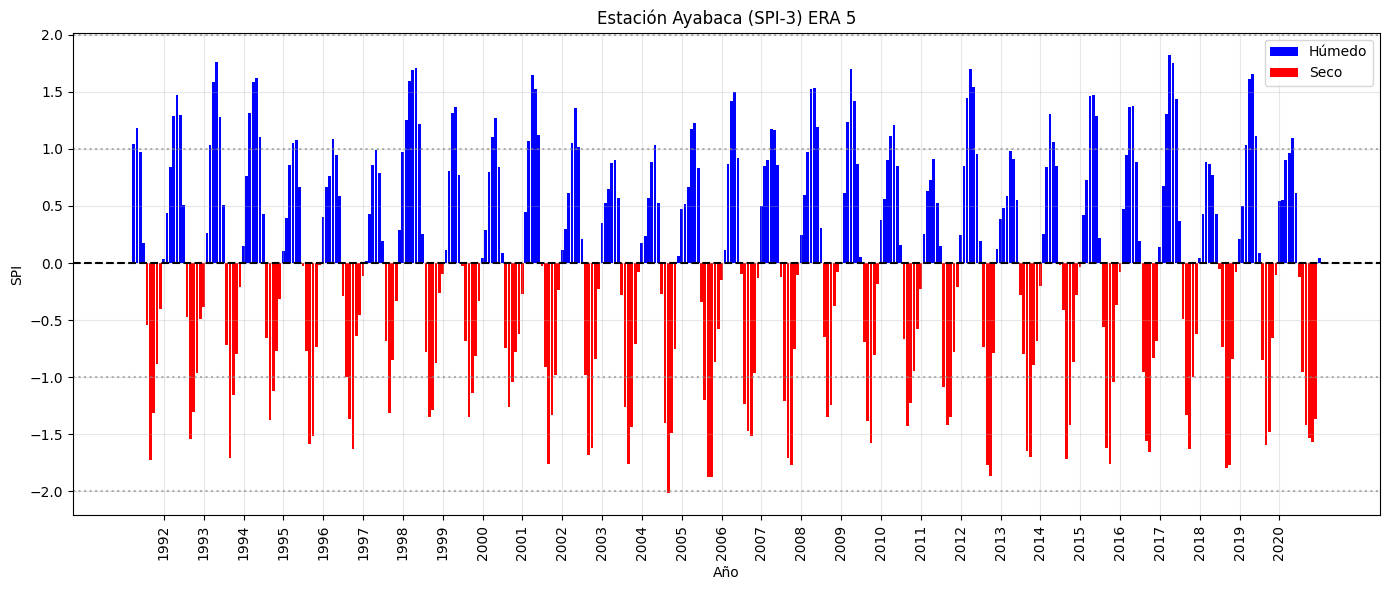

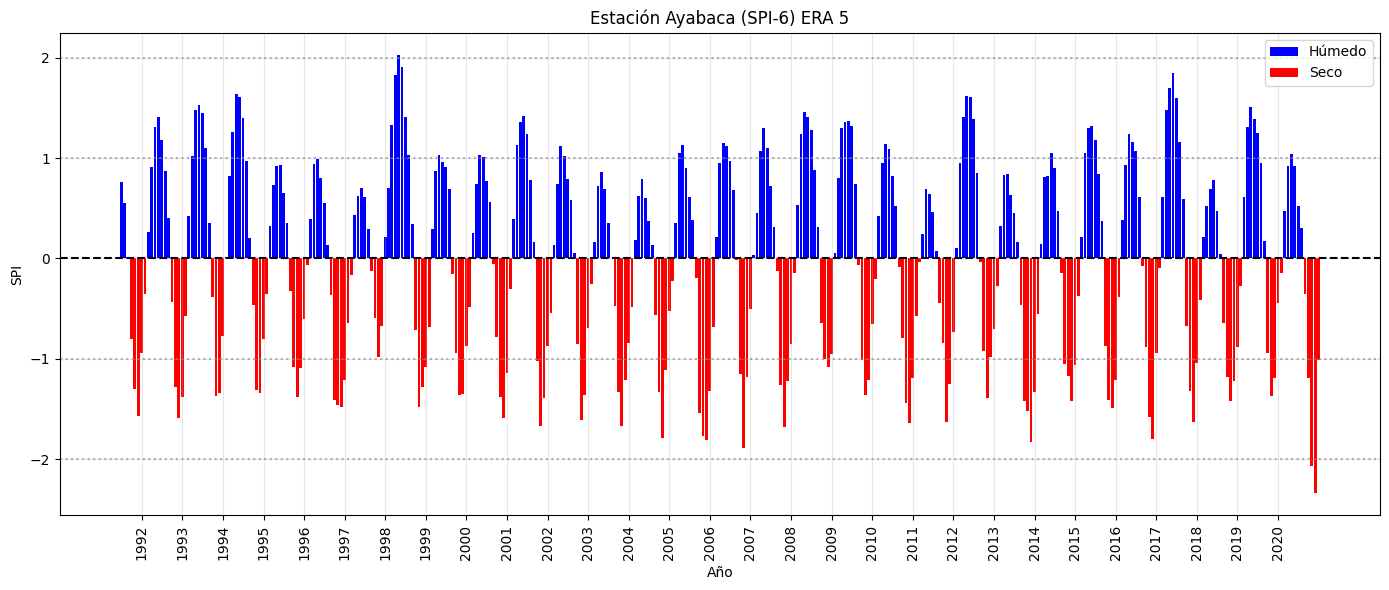

Listo. SPI para la estación Ayabaca generado.


In [159]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# ==========================================================
# 1 — USAR TU DATA DE UNA ESTACIÓN
# ==========================================================
df = df_aya_mensual_E
df['valid_time'] = pd.to_datetime(df['valid_time'])
df = df.sort_values('valid_time')


# ==========================================================
# 2 — FUNCIÓN SPI (McKee)
# ==========================================================
def calcular_spi_mckee(serie, ventana):
    # 1) Acumulado
    acum = serie.rolling(ventana).sum().dropna()

    # 2) Probabilidad de cero
    q = (acum == 0).mean()

    # 3) Ajuste Gamma
    datos = acum[acum > 0]
    alpha, loc, beta = stats.gamma.fit(datos, floc=0)

    # 4) Probabilidad acumulada
    F = q + (1-q) * stats.gamma.cdf(datos, alpha, loc=0, scale=beta)

    # 5) Convertir a SPI
    spi_era_aya = stats.norm.ppf(F)

    # 6) Reconstruir serie
    resultado = np.full(len(serie), np.nan)
    resultado[acum.index] = spi_era_aya
    return resultado


# ==========================================================
# 3 — CALCULAR SPI 3, 6, 12, 24
# ==========================================================
ventanas = [3, 6]

for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['tp_mm'], v)


# ==========================================================
# 4 — GRAFICAR SPI PARA ESTA ESTACIÓN
# ==========================================================
for v in [3, 6]:

    plt.figure(figsize=(14, 6))
    spi_data = df[f"SPI_{v}"]

    colores = ['red' if x < 0 else 'blue' for x in spi_data]

    plt.bar(df['valid_time'], spi_data, color=colores, width=25)

    plt.axhline(0, color='black', linestyle='--')
    plt.axhline(-1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(-2, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(2, color='grey', linestyle=':', alpha=0.6)

    plt.title(f"Estación Ayabaca (SPI-{v}) ERA 5")
    plt.ylabel("SPI")
    plt.xlabel("Año")

    # Etiquetas de año
    años = pd.date_range(df['valid_time'].min(), df['valid_time'].max(), freq='YS')
    plt.xticks(años, [str(a.year) for a in años], rotation=90)

    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='Húmedo'),
        Patch(facecolor='red', label='Seco')
    ]
    plt.legend(handles=legend_elements, loc='upper right', frameon=True)

    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(f"spi_ayabaca_era_{v}.png", dpi=300, bbox_inches='tight')
    plt.show()


# ==========================================================
# 5 — EXPORTAR TABLA FINAL
# ==========================================================
df.to_csv("spi_aya_mensual_era.csv", index=False)
print("Listo. SPI para la estación Ayabaca generado.")


In [160]:
df_aya_mensual_E = df
for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['tp_mm'], v)

df_aya_mensual_E = df   # ← AQUÍ SE GUARDA CON SPI

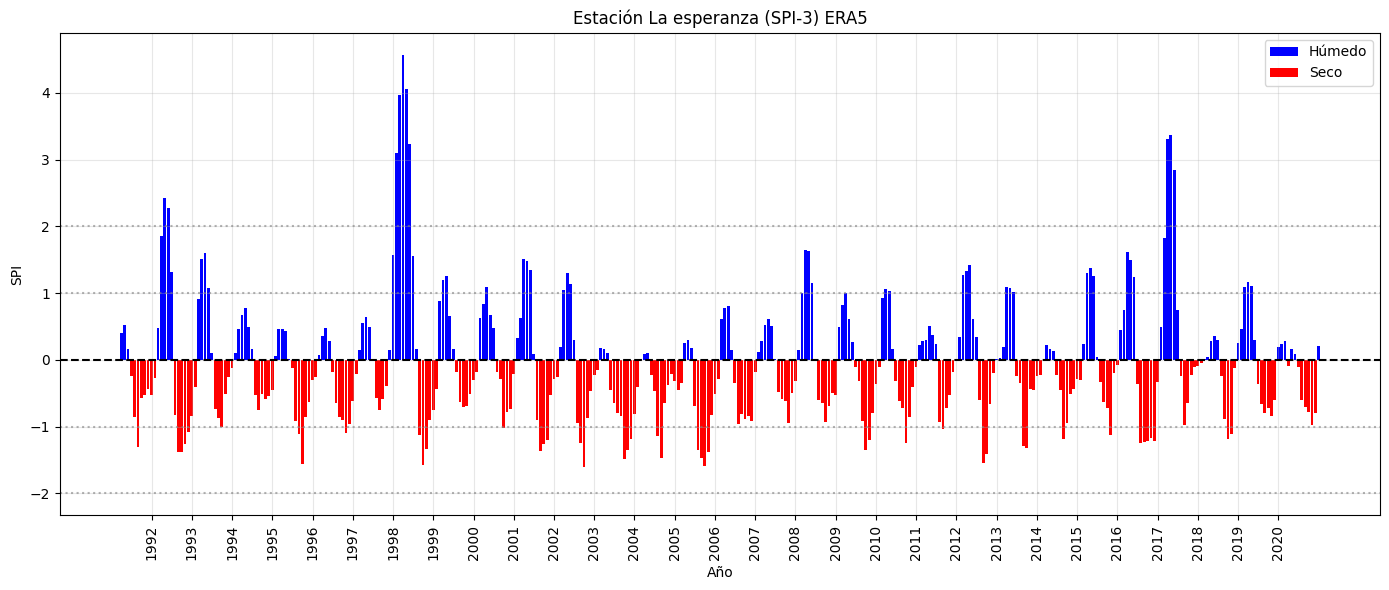

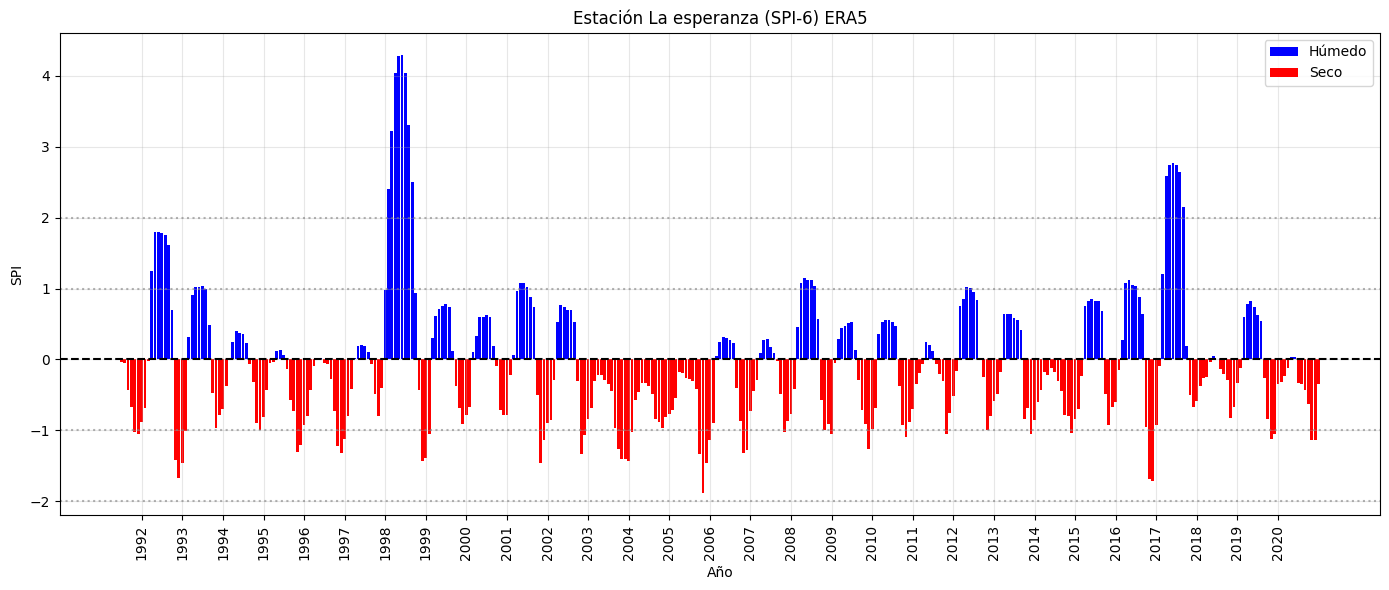

Listo. SPI para la estación La Esperanza generado.


In [112]:

# ==========================================================
# 1 — USAR TU DATA DE UNA ESTACIÓN
# ==========================================================
df = df_esp_mensual_E
df['valid_time'] = pd.to_datetime(df['valid_time'])
df = df.sort_values('valid_time')


# ==========================================================
# 2 — FUNCIÓN SPI (McKee)
# ==========================================================
def calcular_spi_mckee(serie, ventana):
    # 1) Acumulado
    acum = serie.rolling(ventana).sum().dropna()

    # 2) Probabilidad de cero
    q = (acum == 0).mean()

    # 3) Ajuste Gamma
    datos = acum[acum > 0]
    alpha, loc, beta = stats.gamma.fit(datos, floc=0)

    # 4) Probabilidad acumulada
    F = q + (1-q) * stats.gamma.cdf(datos, alpha, loc=0, scale=beta)

    # 5) Convertir a SPI
    spi_era_esp = stats.norm.ppf(F)

    # 6) Reconstruir serie
    resultado = np.full(len(serie), np.nan)
    resultado[acum.index] = spi_era_esp
    return resultado


# ==========================================================
# 3 — CALCULAR SPI 3, 6, 12, 24
# ==========================================================
ventanas = [3, 6]

for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['tp_mm'], v)


# ==========================================================
# 4 — GRAFICAR SPI PARA ESTA ESTACIÓN
# ==========================================================
for v in [3,6]:

    plt.figure(figsize=(14, 6))
    spi_data = df[f"SPI_{v}"]

    colores = ['red' if x < 0 else 'blue' for x in spi_data]

    plt.bar(df['valid_time'], spi_data, color=colores, width=25)

    plt.axhline(0, color='black', linestyle='--')
    plt.axhline(-1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(1, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(-2, color='grey', linestyle=':', alpha=0.6)
    plt.axhline(2, color='grey', linestyle=':', alpha=0.6)

    plt.title(f"Estación La esperanza (SPI-{v}) ERA5")
    plt.ylabel("SPI")
    plt.xlabel("Año")

    # Etiquetas de año
    años = pd.date_range(df['valid_time'].min(), df['valid_time'].max(), freq='YS')
    plt.xticks(años, [str(a.year) for a in años], rotation=90)

    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='Húmedo'),
        Patch(facecolor='red', label='Seco')
    ]
    plt.legend(handles=legend_elements, loc='upper right', frameon=True)

    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(f"spi_espe_era_{v}.png", dpi=300, bbox_inches='tight')
    plt.show()


# ==========================================================
# 5 — EXPORTAR TABLA FINAL
# ==========================================================
df.to_csv("spi_esp_mensual_era.csv", index=False)
print("Listo. SPI para la estación La Esperanza generado.")


In [122]:
df_esp_mensual_E = df
for v in ventanas:
    df[f"SPI_{v}"] = calcular_spi_mckee(df['tp_mm'], v)

df_esp_mensual_E = df   # ← AQUÍ SE GUARDA CON SPI



In [123]:
df_esp_mensual_E.head()


,valid_time,tp,number,latitude,longitude,tp_mm,SPI_3,SPI_6
0,1991-01-31,0.001221,0,-4.92,-81,1.220741,NaN,NaN
1,1991-02-28,0.023701,0,-4.92,-81,23.700771,NaN,NaN
2,1991-03-31,0.015419,0,-4.92,-81,15.418797,0.395291,NaN
3,1991-04-30,0.010006,0,-4.92,-81,10.005531,0.522096,NaN
4,1991-05-31,0.002021,0,-4.92,-81,2.020817,0.168547,NaN


VALIDACION Y COMPARACION

In [140]:
df_pisco = df_esp_mensual_P.copy()
df_pisco['T'] = pd.to_datetime(df_pisco['T'])
df_pisco = df_pisco.sort_values('T')

# Renombrar
df_pisco = df_pisco.rename(columns={'T': 'time'})


In [141]:
df_era = df_esp_mensual_E.copy()
df_era['valid_time'] = pd.to_datetime(df_era['valid_time'])
df_era = df_era.sort_values('valid_time')

# Renombrar para igualar a PISCO
df_era = df_era.rename(columns={'valid_time': 'time'})


In [142]:
df_merged = pd.merge(df_era[['time', 'SPI_3', 'SPI_6']],
                     df_pisco[['time', 'SPI_3', 'SPI_6']],
                     on='time',
                     suffixes=('_ERA', '_PISCO'))


In [120]:
print("ERA columns:", df_era.columns)
print("PISCO columns:", df_pisco.columns)

ERA columns: Index(['time', 'tp', 'number', 'latitude', 'longitude', 'tp_mm'], dtype='object')
PISCO columns: Index(['time', 'Prec', 'Y', 'X'], dtype='object')


In [143]:
corr_spi3 = df_merged[['SPI_3_ERA', 'SPI_3_PISCO']].corr().iloc[0,1]
corr_spi6 = df_merged[['SPI_6_ERA', 'SPI_6_PISCO']].corr().iloc[0,1]

print("Correlación SPI-3:", corr_spi3)
print("Correlación SPI-6:", corr_spi6)


Correlación SPI-3: 0.8273185264427309
Correlación SPI-6: 0.7897025909877619


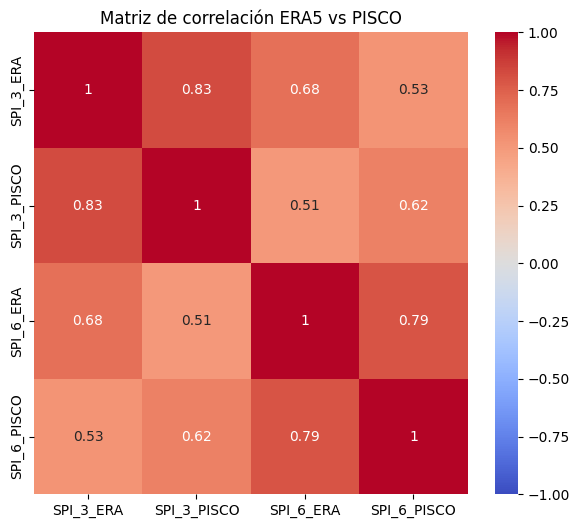

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_merged[['SPI_3_ERA','SPI_3_PISCO','SPI_6_ERA','SPI_6_PISCO']].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación ERA5 vs PISCO")
plt.show()


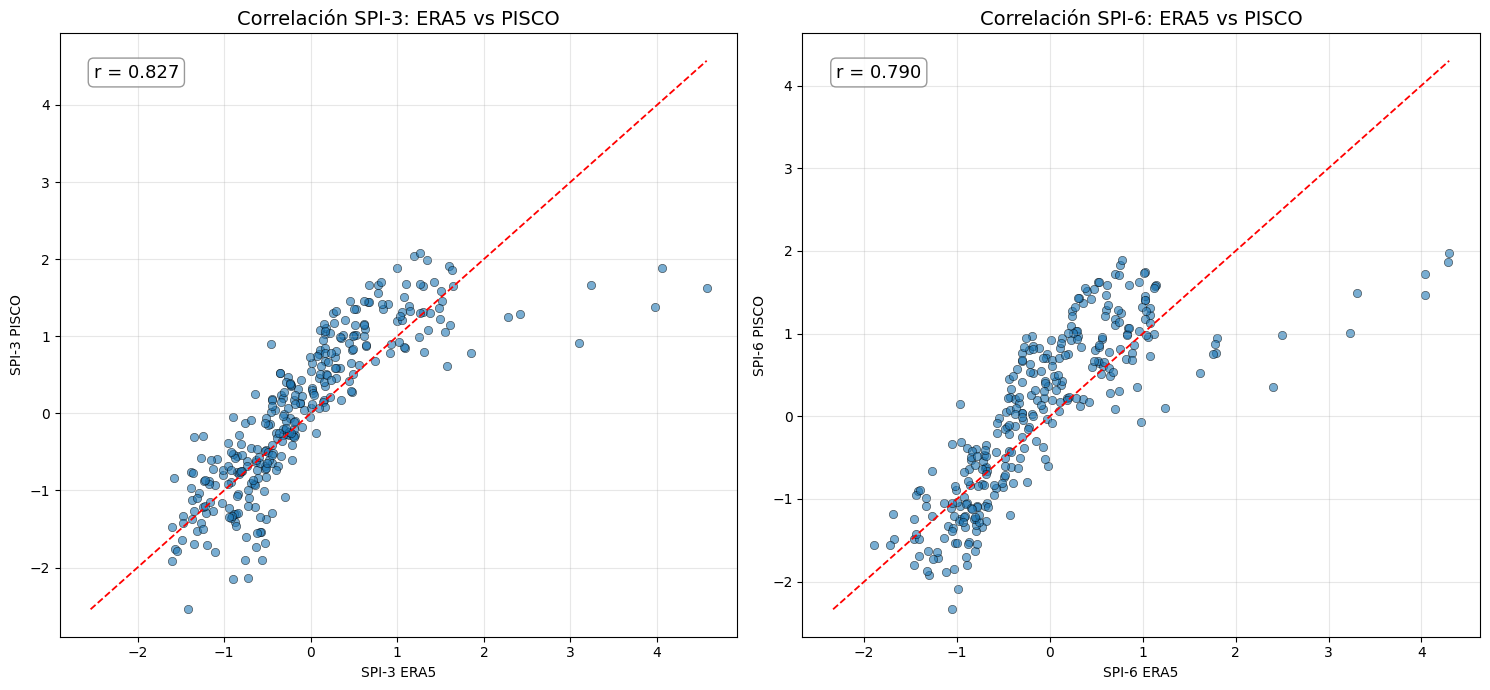

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# --- Calcular correlaciones ---
r3 = df_merged[['SPI_3_ERA', 'SPI_3_PISCO']].corr().iloc[0,1]
r6 = df_merged[['SPI_6_ERA', 'SPI_6_PISCO']].corr().iloc[0,1]

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# =====================
#  PANEL IZQUIERDO: SPI-3
# =====================
ax = axes[0]

ax.scatter(
    df_merged['SPI_3_ERA'], df_merged['SPI_3_PISCO'],
    alpha=0.6, edgecolor='k', linewidth=0.5
)

min_val = min(df_merged['SPI_3_ERA'].min(), df_merged['SPI_3_PISCO'].min())
max_val = max(df_merged['SPI_3_ERA'].max(), df_merged['SPI_3_PISCO'].max())

ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1.3)

ax.set_title("Correlación SPI-3: ERA5 vs PISCO", fontsize=14)
ax.set_xlabel("SPI-3 ERA5")
ax.set_ylabel("SPI-3 PISCO")
ax.grid(alpha=0.3)

ax.text(
    0.05, 0.95,
    f"r = {r3:.3f}",
    transform=ax.transAxes,
    fontsize=13,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8)
)

# =====================
#  PANEL DERECHO: SPI-6
# =====================
ax = axes[1]

ax.scatter(
    df_merged['SPI_6_ERA'], df_merged['SPI_6_PISCO'],
    alpha=0.6, edgecolor='k', linewidth=0.5
)

min_val = min(df_merged['SPI_6_ERA'].min(), df_merged['SPI_6_PISCO'].min())
max_val = max(df_merged['SPI_6_ERA'].max(), df_merged['SPI_6_PISCO'].max())

ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1.3)

ax.set_title("Correlación SPI-6: ERA5 vs PISCO", fontsize=14)
ax.set_xlabel("SPI-6 ERA5")
ax.set_ylabel("SPI-6 PISCO")
ax.grid(alpha=0.3)

ax.text(
    0.05, 0.95,
    f"r = {r6:.3f}",
    transform=ax.transAxes,
    fontsize=13,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8)
)

plt.tight_layout()
plt.show()


AYABACA

In [161]:
df_pisco = df_aya_mensual_P.copy()
df_pisco['T'] = pd.to_datetime(df_pisco['T'])
df_pisco = df_pisco.sort_values('T')

# Renombrar
df_pisco = df_pisco.rename(columns={'T': 'time'})


In [162]:
df_era = df_aya_mensual_E.copy()
df_era['valid_time'] = pd.to_datetime(df_era['valid_time'])
df_era = df_era.sort_values('valid_time')

# Renombrar para igualar a PISCO
df_era = df_era.rename(columns={'valid_time': 'time'})


In [163]:
df_merged = pd.merge(df_era[['time', 'SPI_3', 'SPI_6']],
                     df_pisco[['time', 'SPI_3', 'SPI_6']],
                     on='time',
                     suffixes=('_ERA', '_PISCO'))


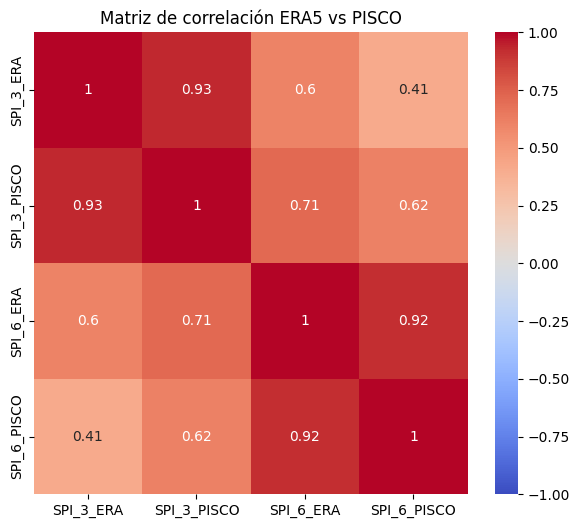

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_merged[['SPI_3_ERA','SPI_3_PISCO','SPI_6_ERA','SPI_6_PISCO']].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación ERA5 vs PISCO")
plt.show()


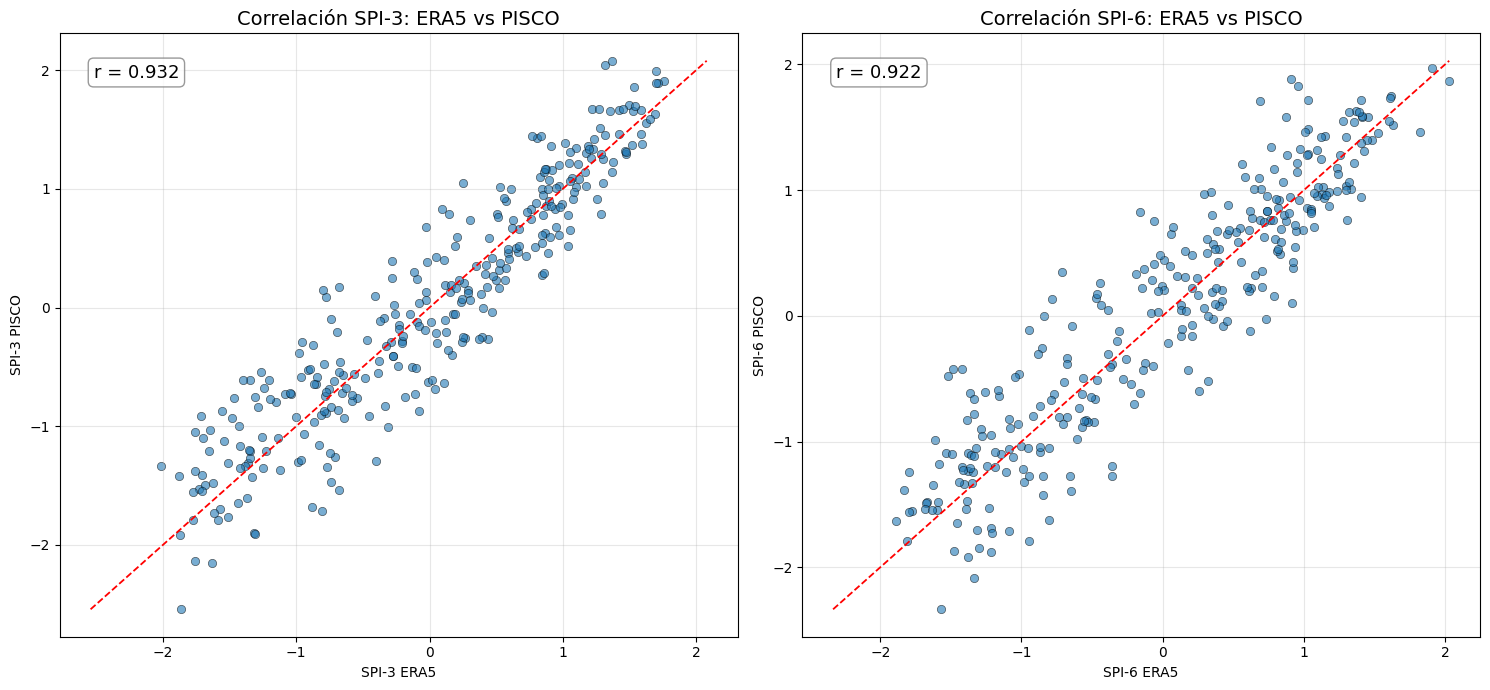

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# --- Calcular correlaciones ---
r3 = df_merged[['SPI_3_ERA', 'SPI_3_PISCO']].corr().iloc[0,1]
r6 = df_merged[['SPI_6_ERA', 'SPI_6_PISCO']].corr().iloc[0,1]

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# =====================
#  PANEL IZQUIERDO: SPI-3
# =====================
ax = axes[0]

ax.scatter(
    df_merged['SPI_3_ERA'], df_merged['SPI_3_PISCO'],
    alpha=0.6, edgecolor='k', linewidth=0.5
)

min_val = min(df_merged['SPI_3_ERA'].min(), df_merged['SPI_3_PISCO'].min())
max_val = max(df_merged['SPI_3_ERA'].max(), df_merged['SPI_3_PISCO'].max())

ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1.3)

ax.set_title("Correlación SPI-3: ERA5 vs PISCO", fontsize=14)
ax.set_xlabel("SPI-3 ERA5")
ax.set_ylabel("SPI-3 PISCO")
ax.grid(alpha=0.3)

ax.text(
    0.05, 0.95,
    f"r = {r3:.3f}",
    transform=ax.transAxes,
    fontsize=13,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8)
)

# =====================
#  PANEL DERECHO: SPI-6
# =====================
ax = axes[1]

ax.scatter(
    df_merged['SPI_6_ERA'], df_merged['SPI_6_PISCO'],
    alpha=0.6, edgecolor='k', linewidth=0.5
)

min_val = min(df_merged['SPI_6_ERA'].min(), df_merged['SPI_6_PISCO'].min())
max_val = max(df_merged['SPI_6_ERA'].max(), df_merged['SPI_6_PISCO'].max())

ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1.3)

ax.set_title("Correlación SPI-6: ERA5 vs PISCO", fontsize=14)
ax.set_xlabel("SPI-6 ERA5")
ax.set_ylabel("SPI-6 PISCO")
ax.grid(alpha=0.3)

ax.text(
    0.05, 0.95,
    f"r = {r6:.3f}",
    transform=ax.transAxes,
    fontsize=13,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8)
)

plt.tight_layout()
plt.show()
